<h1><center>Mengimpor <i>Library</i></center></h1>

<div class="alert alert-danger">Jika pada saat mengimpor <i>library</i>, terdapat <i>error</i> seperti di bawah ini:<br>
<tt><font color=black>&emsp;ModuleNotFoundError: No module named 'EXAMPLE'</tt>

Silakan mengunduh library tersebut terlebih dahulu dengan cara mengetikkan perintah berikut ini:<br>
<tt><font color=black>&emsp;pip install EXAMPLE</tt><br>atau<br>
<tt><font color=black>&emsp;conda install -c anaconda EXAMPLE</tt></div>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai

<h1><center>Mengklasifikasikan Ulasan Menggunakan Bantuan GPT dari OpenAI</center></h1>

OpenAI menyediakan berbagai *language model*. Pada Notebook ini, kita akan menggunakan model **gpt-3.5-turbo**. Jika ingin mempelajari atau menggunakan model lain, silakan mengunjungi halaman [ini](https://openai.com/pricing). API dapat diakses di [sini](https://platform.openai.com/account/api-keys).

<font color=blue>**NOTE: Untuk harganya, OpenAI menggunakan sistem token yang artinya kita akan membayar setiap 1000 token (~750 kata). Misalnya, model gpt-3.5-turbo memiliki tarif sebesar USD 0,002 / 1000 token.**</font>

In [2]:
openai.api_key = "ISERT YOUR API OPEN AI KEY HERE"

*Load* data yang ingin diklasifikasikan. Silakan menyesuaikan nama *file*-nya. 

In [3]:
df = pd.read_excel("Translated.xlsx")
df.head()

,caption,response,relative_date,rating,username,branch,clean,case_folding,slang_words,tokenizing,stop_removal,stemming,english
0,Terima kasih mbak Ria atas pelayanannya yg ter...,Terimakasih Bpk/ibu atas review yang di berika...,4 days ago,5.0,Reenfiel Elesten,Angkasa,Terima kasih mbak Ria atas pelayanannya yg ter...,terima kasih mbak ria atas pelayanannya yg ter...,terima kasih mbak ria atas pelayanannya yang t...,"['terima', 'kasih', 'mbak', 'ria', 'atas', 'pe...","['terima', 'kasih', 'mbak', 'ria', 'pelayanann...",terima kasih mbak ria layan percaya quick resp...,thank you Ms. Ria Layan for trusting the quick...
1,Tokoh terpercaya dan pelayanan yg sangat baik....,Terimakasih Ibu Diana atas review yang diberik...,4 days ago,5.0,Diana Helmes,Angkasa,Tokoh terpercaya dan pelayanan yg sangat baikT...,tokoh terpercaya dan pelayanan yg sangat baikt...,tokoh terpercaya dan pelayanan yang sangat bai...,"['tokoh', 'terpercaya', 'dan', 'pelayanan', 'y...","['tokoh', 'terpercaya', 'pelayanan', 'baikteri...",tokoh percaya layan baikterima kasih mbak lasm...,"a character who believes in good service, than..."
2,"Dengan sales Mas Ahmad Kosasih semua di bantu,...",Terimakasih Bpk/ibu atas review yang diberikan...,6 days ago,5.0,abet w,Angkasa,Dengan sales Mas Ahmad Kosasih semua di bantu ...,dengan sales mas ahmad kosasih semua di bantu ...,dengan sales mas ahmad kosasih semua di bantu ...,"['dengan', 'sales', 'mas', 'ahmad', 'kosasih',...","['sales', 'mas', 'ahmad', 'kosasih', 'bantu', ...",sales mas ahmad kosasih bantu test drive recom...,sales mas ahmad kosasih helped with a test dri...
3,Keren pelayanan Auto2000 ANGKASA. Sekarang mal...,"Terimakasih Bpk Jimmy, atas review yang diberi...",a week ago,5.0,Jimmy H Susanto,Angkasa,Keren pelayanan auto2000 ANGKASA Sekarang mala...,keren pelayanan auto2000 angkasa sekarang mala...,keren pelayanan auto2000 angkasa sekarang mala...,"['keren', 'pelayanan', 'auto2000', 'angkasa', ...","['keren', 'pelayanan', 'auto2000', 'angkasa', ...",keren layan auto2000 angkasa deh lalu service ...,"it's cool to service the auto2000 space, then ..."
4,Tempat langganan beli Toyota sama mba Lasmaria...,Terimakasih Bpk/Ibu atas review yang diberikan...,2 weeks ago,5.0,Riskhy Andriyan,Angkasa,Tempat langganan beli Toyota sama mba Lasmaria...,tempat langganan beli toyota sama mba lasmaria...,tempat langganan beli toyota sama mbak lasmari...,"['tempat', 'langganan', 'beli', 'toyota', 'sam...","['langganan', 'beli', 'toyota', 'mbak', 'lasma...",langgan beli toyota mbak lasmaria perfect kece...,"subscribe to buy a toyota, Ms. Lasmaria, perfe..."


**OPSIONAL**: Memilih periode yang ingin diklasifikasikan.

Abaikan langkah ini jika ingin mengklasifikasikan seluruh data.

In [5]:
df = df[df["relative_date"].isin(['a week ago', '2 weeks ago', '3 weeks ago', 'a month ago', '2 months ago'])]
df = df.reset_index(drop=True)
df.head()

,caption,response,relative_date,rating,username,branch,clean,case_folding,slang_words,tokenizing,stop_removal,stemming,english
0,Keren pelayanan Auto2000 ANGKASA. Sekarang mal...,"Terimakasih Bpk Jimmy, atas review yang diberi...",a week ago,5.0,Jimmy H Susanto,Angkasa,Keren pelayanan auto2000 ANGKASA Sekarang mala...,keren pelayanan auto2000 angkasa sekarang mala...,keren pelayanan auto2000 angkasa sekarang mala...,"['keren', 'pelayanan', 'auto2000', 'angkasa', ...","['keren', 'pelayanan', 'auto2000', 'angkasa', ...",keren layan auto2000 angkasa deh lalu service ...,"it's cool to service the auto2000 space, then ..."
1,Tempat langganan beli Toyota sama mba Lasmaria...,Terimakasih Bpk/Ibu atas review yang diberikan...,2 weeks ago,5.0,Riskhy Andriyan,Angkasa,Tempat langganan beli Toyota sama mba Lasmaria...,tempat langganan beli toyota sama mba lasmaria...,tempat langganan beli toyota sama mbak lasmari...,"['tempat', 'langganan', 'beli', 'toyota', 'sam...","['langganan', 'beli', 'toyota', 'mbak', 'lasma...",langgan beli toyota mbak lasmaria perfect kece...,"subscribe to buy a toyota, Ms. Lasmaria, perfe..."
2,Pelayanan dari sales Auto 2000 Angkasa sangat ...,Selamat Pagi Bpk Roman. Terima kasih atas revi...,2 weeks ago,5.0,Roman B,Angkasa,Pelayanan dari sales auto2000 Angkasa sangat b...,pelayanan dari sales auto2000 angkasa sangat b...,pelayanan dari sales auto2000 angkasa sangat b...,"['pelayanan', 'dari', 'sales', 'auto2000', 'an...","['pelayanan', 'sales', 'auto2000', 'angkasa', ...",layan sales auto2000 angkasa mbak lasmaria tot...,serve sales auto2000 space Ms. Lasmaria totali...
3,mantab,Terimakasih untuk reviewnya Bpk Yosua,2 weeks ago,5.0,yosua siagian,Angkasa,mantab,mantab,mantab,['mantab'],['mantab'],mantab,great
4,Fasilitas dan pelayanan ok banget Pak Kosasih ...,Terima kasih Ibu Fitri atas review yang diber...,2 weeks ago,5.0,Fitri Wahyuni,Angkasa,Fasilitas dan pelayanan ok banget Pak Kosasih ...,fasilitas dan pelayanan ok banget pak kosasih ...,fasilitas dan pelayanan ok banget pak kosasih ...,"['fasilitas', 'dan', 'pelayanan', 'ok', 'bange...","['fasilitas', 'pelayanan', 'ok', 'banget', 'ko...",fasilitas layan ok banget kosasih the best,"the service facilities are really ok, the best"


Membuat sebuah fungsi untuk mengklasifikasikan ulasan menggunakan model GPT. Sesuaikan parameter `model` dengan model GPT yang digunakan. Jika ingin memodifikasi klasifikasi ulasannya, tulis pada parameter `content`.

In [16]:
def assign_topic(text):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "user",
                "content": f'Please assign ONLY one of the topics (Booking, Fasilitas, Fasilitas Ruang Tunggu, Harga Mahal, Kualitas, Pelayanan, Waktu Antrean) that is most relevant to this text "{text}" in the format [Topic: ...]. Please make sure write in the format that I requested only.'
            }
        ]
    )

    return response["choices"][0]["message"]["content"]

Mengaplikasikan fungsi di atas untuk keseluruhan ulasan.

<font color=blue>**NOTE: Proses ini bisa memakan waktu cukup lama tergantung ukuran datanya.**</font>

In [23]:
%%time

topics = []

for text in df["caption"]:
    labeled_topic = "Topic: Others"
    if pd.isnull(text): 
        topics.append(labeled_topic)
    else:
        for _ in range(5):
            try:
                labeled_topic = assign_topic(text)
                break
            except:
                pass
        topics.append(labeled_topic)

CPU times: total: 938 ms
Wall time: 42min 5s


<h1><center>Melakukan <i>Data Cleaning</i></center></h1>

Karena hasil klasifikasi tidak selalu dalam format yang konsisten, kita melakukan *cleaning* dengan cara membuang karakter yang tidak diperlukan.

In [37]:
cleaned_topics = [i for i in topics]

for idx, val in enumerate(cleaned_topics):
    if "Booking" in val:
        cleaned_topics[idx] = "Booking"
    elif "Fasilitas" in val:
        cleaned_topics[idx] = "Fasilitas"
    elif "Fasilitas Ruang Tunggu " in val:
        cleaned_topics[idx] = "Fasilitas Ruang Tunggu "
    elif "Harga Mahal" in val:
        cleaned_topics[idx] = "Harga Mahal"
    elif "Kualitas" in val:
        cleaned_topics[idx] = "Kualitas"
    elif "Pelayanan" in val:
        cleaned_topics[idx] = "Pelayanan"
    elif "Waktu Antrean" in val:
        cleaned_topics[idx] = "Waktu Antrean"
    else:
        cleaned_topics[idx] = "Others"

Tambahkan hasil klasifikasi ulasan ke *dataframe*. Silakan mengganti nama kolom jika memang diperlukan.

In [40]:
df_topics = df.copy()
df_topics["topic"] = cleaned_topics
df_topics.head()

,caption,response,relative_date,rating,username,branch,clean,case_folding,slang_words,tokenizing,stop_removal,stemming,english,topic
0,Keren pelayanan Auto2000 ANGKASA. Sekarang mal...,"Terimakasih Bpk Jimmy, atas review yang diberi...",a week ago,5.0,Jimmy H Susanto,Angkasa,Keren pelayanan auto2000 ANGKASA Sekarang mala...,keren pelayanan auto2000 angkasa sekarang mala...,keren pelayanan auto2000 angkasa sekarang mala...,"['keren', 'pelayanan', 'auto2000', 'angkasa', ...","['keren', 'pelayanan', 'auto2000', 'angkasa', ...",keren layan auto2000 angkasa deh lalu service ...,"it's cool to service the auto2000 space, then ...",Pelayanan
1,Tempat langganan beli Toyota sama mba Lasmaria...,Terimakasih Bpk/Ibu atas review yang diberikan...,2 weeks ago,5.0,Riskhy Andriyan,Angkasa,Tempat langganan beli Toyota sama mba Lasmaria...,tempat langganan beli toyota sama mba lasmaria...,tempat langganan beli toyota sama mbak lasmari...,"['tempat', 'langganan', 'beli', 'toyota', 'sam...","['langganan', 'beli', 'toyota', 'mbak', 'lasma...",langgan beli toyota mbak lasmaria perfect kece...,"subscribe to buy a toyota, Ms. Lasmaria, perfe...",Pelayanan
2,Pelayanan dari sales Auto 2000 Angkasa sangat ...,Selamat Pagi Bpk Roman. Terima kasih atas revi...,2 weeks ago,5.0,Roman B,Angkasa,Pelayanan dari sales auto2000 Angkasa sangat b...,pelayanan dari sales auto2000 angkasa sangat b...,pelayanan dari sales auto2000 angkasa sangat b...,"['pelayanan', 'dari', 'sales', 'auto2000', 'an...","['pelayanan', 'sales', 'auto2000', 'angkasa', ...",layan sales auto2000 angkasa mbak lasmaria tot...,serve sales auto2000 space Ms. Lasmaria totali...,Pelayanan
3,mantab,Terimakasih untuk reviewnya Bpk Yosua,2 weeks ago,5.0,yosua siagian,Angkasa,mantab,mantab,mantab,['mantab'],['mantab'],mantab,great,Kualitas
4,Fasilitas dan pelayanan ok banget Pak Kosasih ...,Terima kasih Ibu Fitri atas review yang diber...,2 weeks ago,5.0,Fitri Wahyuni,Angkasa,Fasilitas dan pelayanan ok banget Pak Kosasih ...,fasilitas dan pelayanan ok banget pak kosasih ...,fasilitas dan pelayanan ok banget pak kosasih ...,"['fasilitas', 'dan', 'pelayanan', 'ok', 'bange...","['fasilitas', 'pelayanan', 'ok', 'banget', 'ko...",fasilitas layan ok banget kosasih the best,"the service facilities are really ok, the best",Pelayanan


OPSIONAL: Memvisualisasikan jumlah ulasan setiap klasifikasi untuk mendapatkan gambaran besar.

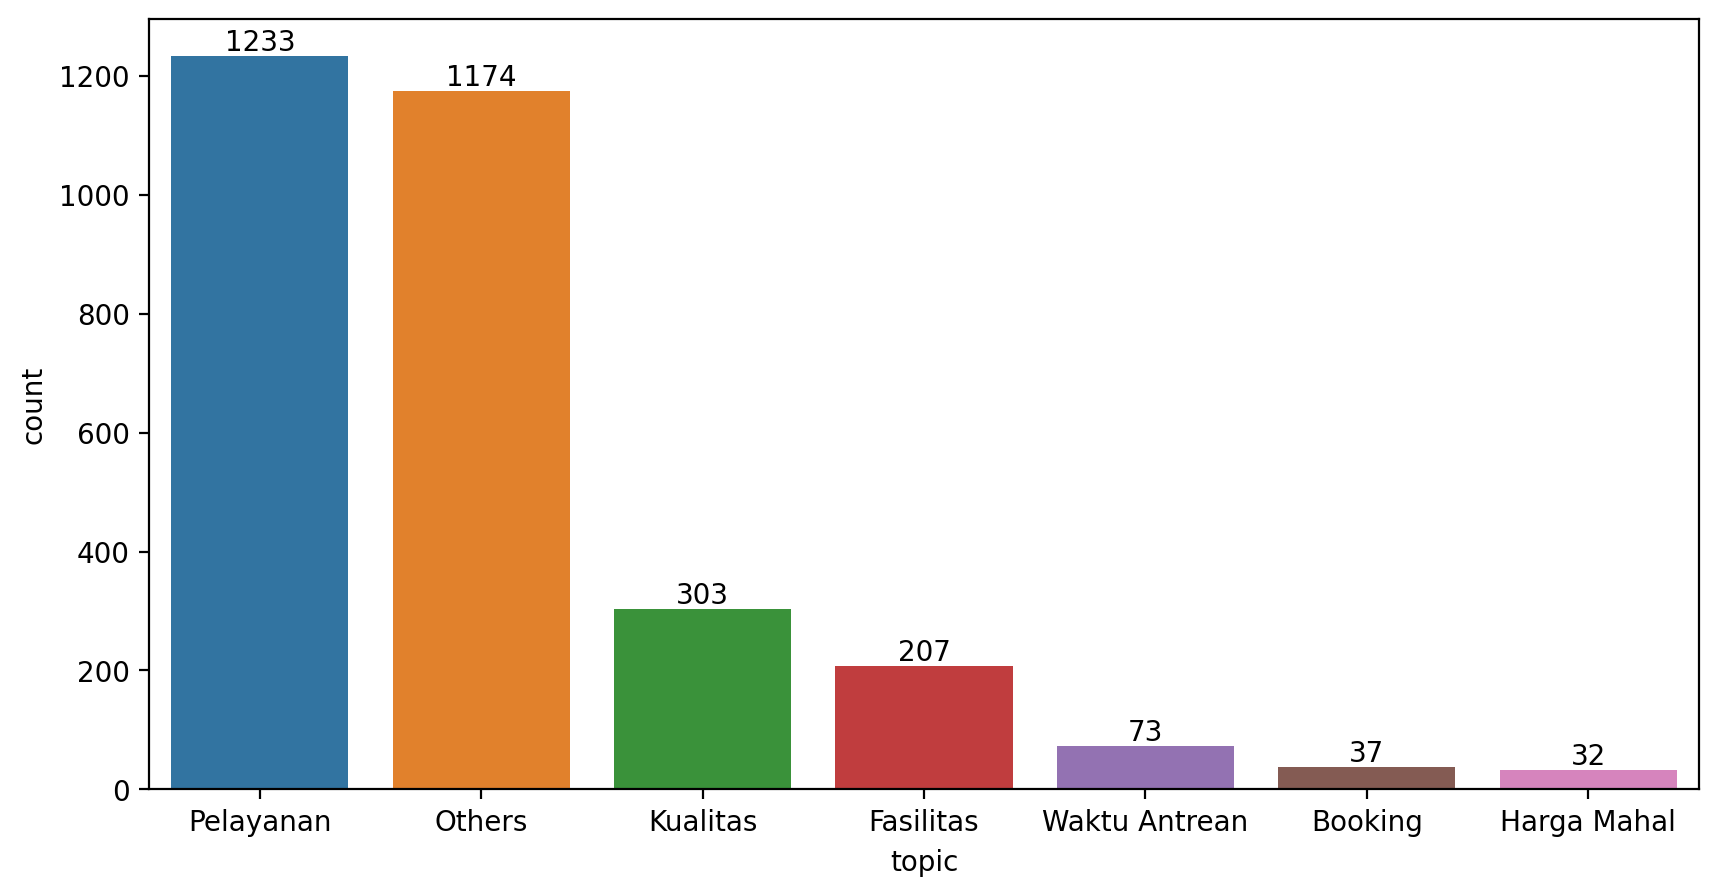

In [61]:
plt.figure(figsize=(10, 5), dpi=200)
ax = sns.countplot(
    data=df_topics,
    x="topic",
    order=df_topics["topic"].value_counts().index
)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Menyimpan *dataframe* dalam bentuk Excel dan membuang kolom-kolom yang tidak diperlukan.

In [67]:
df_topics.drop(['clean', 'case_folding', 'slang_words', 'tokenizing', 'stop_removal', 'stemming'], axis=1).to_excel("labeled_data_2023.xlsx", index=False)